In [18]:
import pdftotext
import matplotlib.pyplot as plt

In [19]:
def is_image(file_path):
    with open(file_path, "rb") as f:
        return pdftotext.PDF(f)

In [21]:
fpath = "../input/India/9.National Agroforestry Policy_2014.pdf"
print(is_image(fpath))

## Load Data

In [99]:
txt_path = "../input/India/Sample_NATIONALAGROFORESTRYPOLICY.txt"
with open(txt_path, "r") as txt_file:
    txt = txt_file.read()

In [109]:
# Optional preprocessing
txt = txt.replace("\n", " ").replace("\t", " ").strip()

## NLTK

In [56]:
import nltk.data

In [12]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

In [110]:
sents1 = tokenizer.tokenize(txt)

In [111]:
len(sents1)

215

(array([16., 49., 64., 40., 21., 12.,  7.,  2.,  1.,  3.]),
 array([  2. ,  56.2, 110.4, 164.6, 218.8, 273. , 327.2, 381.4, 435.6,
        489.8, 544. ]),
 <BarContainer object of 10 artists>)

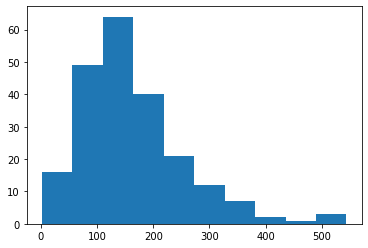

In [112]:
sent_lengths = [len(sent) for sent in sents1]
plt.hist(sent_lengths)

## SpaCy

In [63]:
import spacy 

In [64]:
nlp = spacy.load("en_core_web_lg") 

In [113]:
doc = nlp(txt)

In [114]:
sents = list(doc.sents)

In [115]:
len(sents)

259

(array([58., 52., 68., 36., 21., 14.,  6.,  0.,  1.,  3.]),
 array([ 1. ,  9.8, 18.6, 27.4, 36.2, 45. , 53.8, 62.6, 71.4, 80.2, 89. ]),
 <BarContainer object of 10 artists>)

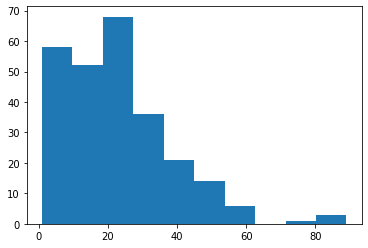

In [116]:
sent_lengths = [len(sent) for sent in sents]
plt.hist(sent_lengths)

In [117]:
for i, (sent_spacy, sent_nltk) in enumerate(zip(sents[:20], sents1[:20])):
    print(f"Spacy sentence {i}: {sent_spacy}")
    print(f"NLTK sentence {i}: {sent_nltk}\n-------------------------")

Spacy sentence 0: NATIONAL AGROFORESTRY POLICY 2014 GOVERNMENT OF INDIA DEPARTMENT OF AGRICULTURE & COOPERATION MINISTRY OF AGRICULTURE
NLTK sentence 0: NATIONAL AGROFORESTRY POLICY 2014 GOVERNMENT OF INDIA DEPARTMENT OF AGRICULTURE & COOPERATION MINISTRY OF AGRICULTURE NEW DELHI   National Agroforestry Policy 1.
-------------------------
Spacy sentence 1: NEW DELHI   National Agroforestry Policy 1.
NLTK sentence 1: Preamble 1.1.
-------------------------
Spacy sentence 2: Preamble 1.1.
NLTK sentence 2: Agroforestry is defined as a land use system which integrate trees and shrubs on farmlands and rural landscapes to enhance productivity, profitability, diversity and ecosystem sustainability.
-------------------------
Spacy sentence 3: Agroforestry is defined as a land use system which integrate trees and shrubs on farmlands and rural landscapes to enhance productivity, profitability, diversity and ecosystem sustainability.
NLTK sentence 3: It is a dynamic, ecologically based, natural r

## Observations

- It appears that spaCy gets confused with numbers (i.e 1.4 or 3.4) and counts them as their own sentence
- Replacing new lines, tabs and trailing spaces seem to benefit the sentence splitting for spaCy.

**TODO**:
- Check other documents
- Compare with rule based system

**General TODO**:
- Make sure to define the PDF reading part well